In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

In [21]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [23]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

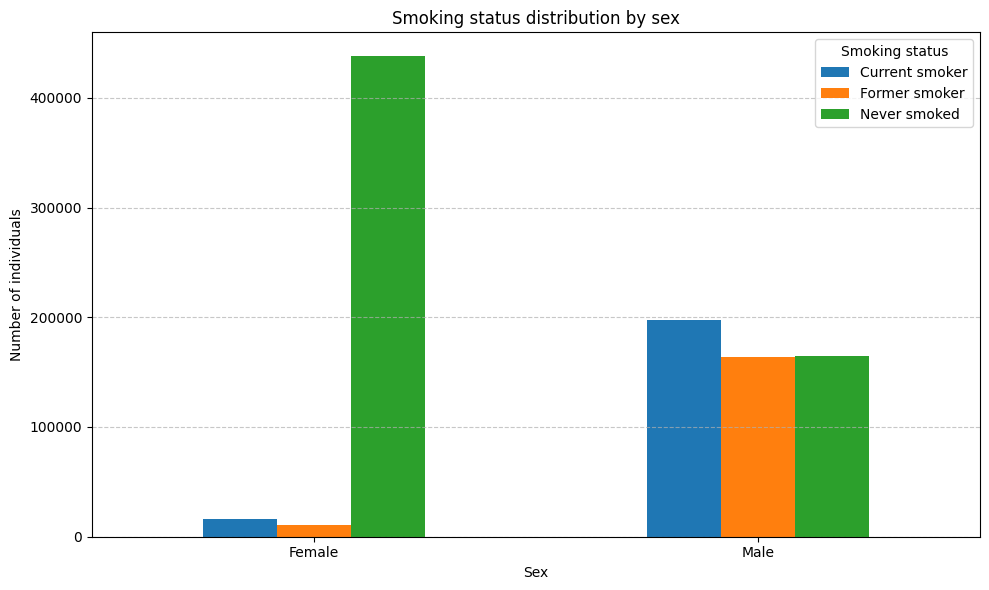

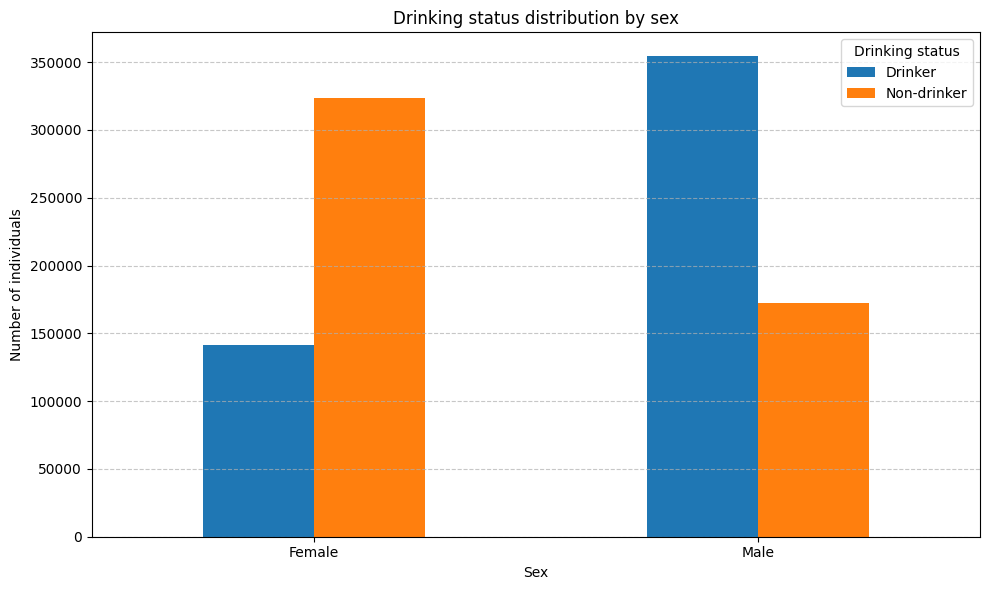

In [24]:

# Map smoking and drinking status to readable labels
smoke_map = {1: 'Never smoked', 2: 'Former smoker', 3: 'Current smoker'}
drink_map = {'Y': 'Drinker', 'N': 'Non-drinker'}

df['Smoking status'] = df['SMK_stat_type_cd'].map(smoke_map)
df['Drinking status'] = df['DRK_YN'].map(drink_map)

# ---- Smoking status by sex ----
smoking_counts = df.groupby(['sex', 'Smoking status']).size().unstack()

# Plot smoking distribution
smoking_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Smoking status distribution by sex")
plt.xlabel("Sex")
plt.ylabel("Number of individuals")
plt.xticks(rotation=0)
plt.legend(title="Smoking status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---- Drinking status by sex ----
drinking_counts = df.groupby(['sex', 'Drinking status']).size().unstack()

# Plot drinking distribution
drinking_counts.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Drinking status distribution by sex")
plt.xlabel("Sex")
plt.ylabel("Number of individuals")
plt.xticks(rotation=0)
plt.legend(title="Drinking status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

                 age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.7000

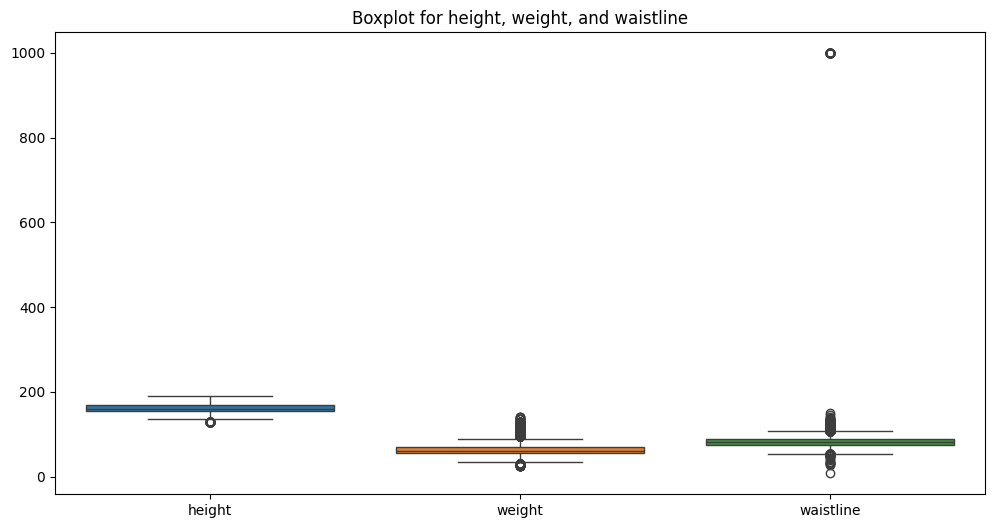

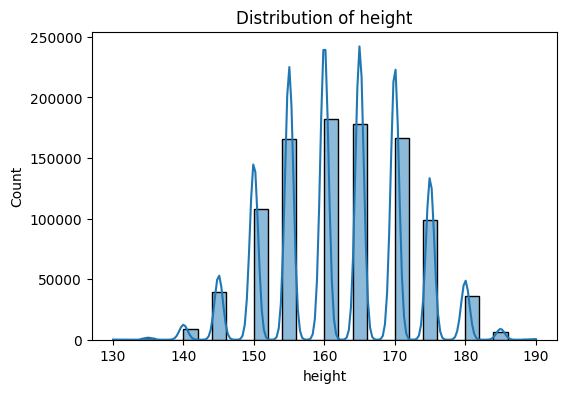

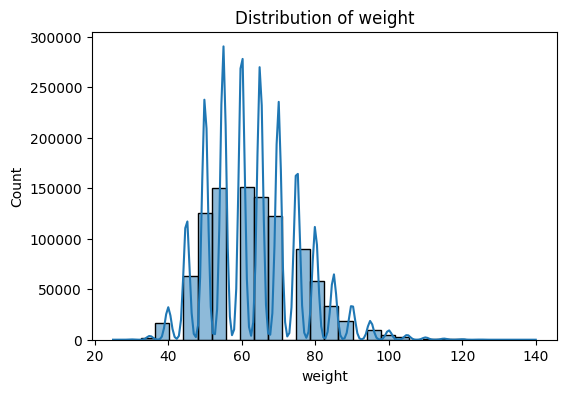

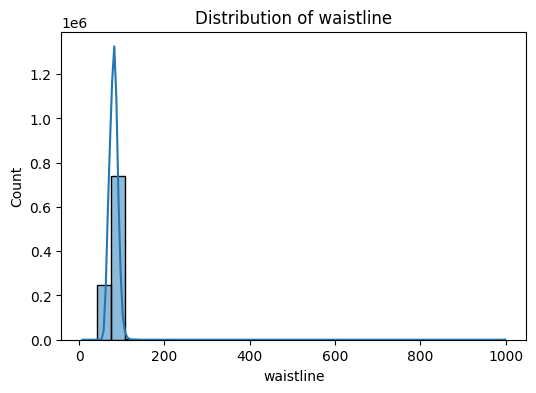

Outliers in 'weight': 19221 values
Lower bound: 32.50, Upper bound: 92.50
Number of extreme z-score values: 197163


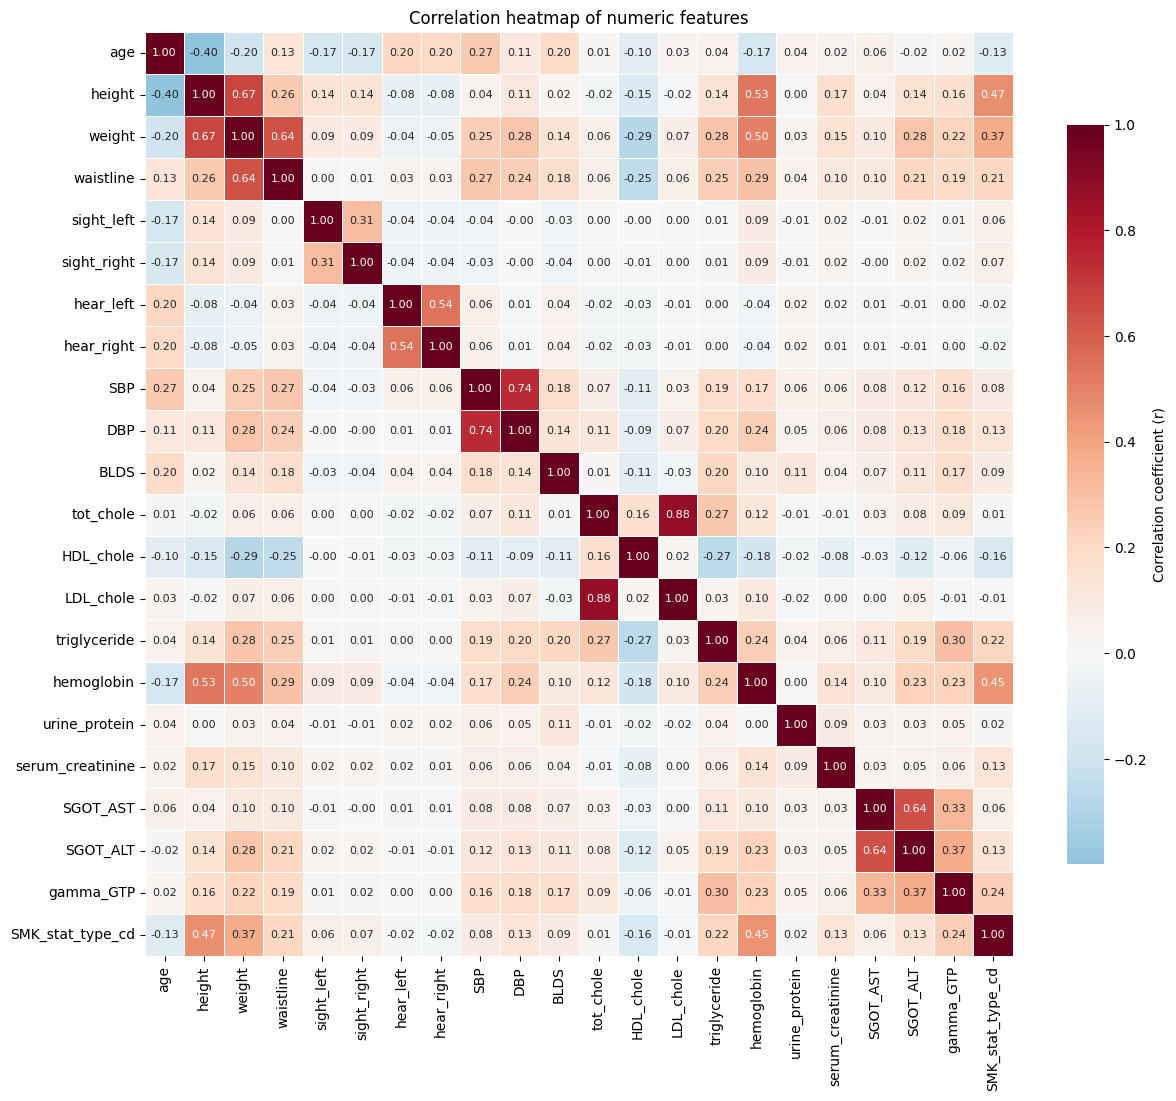

In [30]:
# --- 1️⃣ Select numeric columns only ---
numeric_cols = df.select_dtypes(include=[np.number]).columns

# --- 2️⃣ Quick overview: detect extreme values with describe() ---
print(df[numeric_cols].describe())

# --- 3️⃣ Visual method 1: Boxplots for key variables ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['height', 'weight', 'waistline']])
plt.title("Boxplot for height, weight, and waistline")
plt.show()

# --- 4️⃣ Visual method 2: Distribution plots to see skewness/outliers ---
for col in ['height', 'weight', 'waistline']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# --- 5️⃣ Statistical method: IQR rule (Interquartile Range) ---
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Example: find outliers in 'weight'
outliers_weight, lb, ub = detect_outliers_iqr(df, 'weight')
print(f"Outliers in 'weight': {len(outliers_weight)} values")
print(f"Lower bound: {lb:.2f}, Upper bound: {ub:.2f}")

# --- 6️⃣ Z-score method (standard deviation approach) ---
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols].dropna()))
threshold = 3  # typical cut-off
outlier_rows = np.where(z_scores > threshold)
print(f"Number of extreme z-score values: {len(outlier_rows[0])}")

# --- 7️⃣ Optional: visualize correlation between features and outliers ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    df[numeric_cols].corr(),
    cmap="RdBu_r",           # Diverging colormap for contrast
    center=0,                # Middle color for zero correlation
    annot=True,              # Show numbers
    fmt=".2f",               # Two decimal places
    annot_kws={"size": 8},   # Smaller font for readability
    linewidths=0.5,          # Grid lines
    cbar_kws={"shrink": 0.8, "label": "Correlation coefficient (r)"}
)

plt.title("Correlation heatmap of numeric features")
plt.show()